## Assignment 2
## Problem Statement E

### Dataset: uci-news-aggregator.csv

https://drive.google.com/file/d/1fQYedyo5KGYT6g6v5dJKnO9qOuJ8q4M8/view?usp=sharing
- Note: Use First 5000 rows of dataset from the original dataset given

## Group 97

1. Student 1: PEYALA SAMARASIMHA REDDY ID: 2023AA05072
2. Student 2: PEGALLAPATI SAI MAHARSHI ID: 2023AA05924
3. Student 3: CHADALAWADA VISWANATH HEMANTH ID: 2023AA05195
4. Student 4: SIGINAM SIVASAI ID: 2023AA05371

# Task 1

Load the dataset, select the first 5000 rows, and perform a comprehensive Exploratory Data
Analysis (EDA) followed by necessary preprocessing steps. (2 Mark)

In [2]:
import pandas as pd

# Try using a different encoding
df = pd.read_csv('uci-news-aggregator.csv', encoding='ISO-8859-1')

# Select first 5000 rows
df = df.head(5000)

# Display the first few rows to understand the structure
df.head()


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


###  Exploratory Data Analysis (EDA)

In [3]:
# Check the shape of the dataset
df.shape


(5000, 8)

In [4]:
# Check for missing values
df.isnull().sum()


ID           0
TITLE        0
URL          0
PUBLISHER    1
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [5]:
# Get unique values in each column
df.nunique()


ID           5000
TITLE        4983
URL          5000
PUBLISHER    1733
CATEGORY        4
STORY          67
HOSTNAME     1715
TIMESTAMP      12
dtype: int64

In [6]:
# Get general information
df.describe(include='all')


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,5000.000000,5000,5000,4999,5000,5000,5000,5.000000e+03
unique,NaN,4983,5000,1733,4,67,1715,NaN
top,NaN,US stock market slips in midday trading after ...,http://www.latimes.com/business/money/la-fi-mo...,Examiner.com,e,dHmpog6unxaYYaMzYMEdbkeDeB9iM,www.examiner.com,NaN
freq,NaN,2,1,62,2038,322,62,NaN
mean,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.394521e+12
std,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,2.862931e+07
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.394470e+12
25%,1250.750000,NaN,NaN,NaN,NaN,NaN,NaN,1.394500e+12
50%,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.394530e+12
75%,3750.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.394540e+12


<Axes: title={'center': 'Title Length Distribution'}, ylabel='Frequency'>

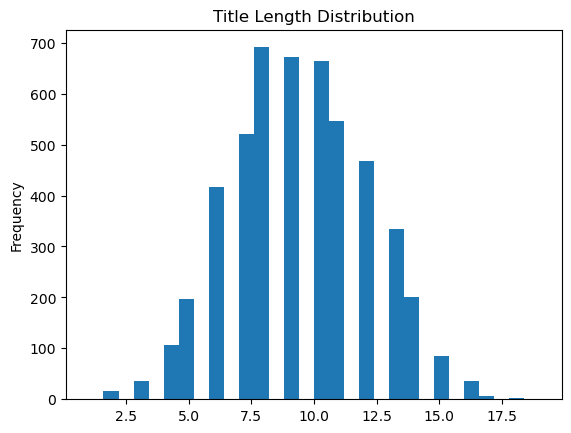

In [7]:
# Check the distribution of the length of titles
df['title_length'] = df['TITLE'].apply(lambda x: len(x.split()))
df['title_length'].plot(kind='hist', bins=30, title="Title Length Distribution")


### Data Preprocessing

In [8]:
# Remove duplicate rows
df.drop_duplicates(subset=['TITLE'], keep='first', inplace=True)


In [9]:
import re

# Remove special characters from titles
df['clean_title'] = df['TITLE'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))


In [10]:
# Convert all titles to lowercase
df['clean_title'] = df['clean_title'].str.lower()


In [11]:
# After preprocessing and EDA
df.head(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,title_length,clean_title
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12,12,fed official says weak data caused by weather ...
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12,12,feds charles plosser sees high bar for change ...
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12,11,us open stocks fall after fed official hints a...
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12,9,fed risks falling behind the curve charles plo...
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12,8,feds plosser nasty weather has curbed job growth
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1.394470e+12,8,plosser fed may have to accelerate tapering pace
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1.394470e+12,8,feds plosser taper pace may be too slow
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1.394470e+12,14,feds plosser expects us unemployment to fall t...
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1.394470e+12,11,us jobs growth last month hit by weatherfed pr...
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1.394470e+12,10,ecb unlikely to end sterilisation of smp purch...


# Task 2 

### Implementing Parsing Algorithms [ 1+ 3 +3+1]

#### 1. Display the POS tagging on the first 2 rows of ‘title’

In [12]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Display POS tags for the first two titles
for i, row in df.head(2).iterrows():
    print(f"Title {i+1}: {row['clean_title']}")
    doc = nlp(row['clean_title'])
    for token in doc:
        print(f'{token.text}: {token.pos_}, {token.tag_}')
    print("\n")


/home/samara/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/samara/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


Title 1: fed official says weak data caused by weather should not slow taper
fed: PROPN, NNP
official: NOUN, NN
says: VERB, VBZ
weak: ADJ, JJ
data: NOUN, NNS
caused: VERB, VBN
by: ADP, IN
weather: NOUN, NN
should: AUX, MD
not: PART, RB
slow: VERB, VB
taper: NOUN, NN


Title 2: feds charles plosser sees high bar for change in pace of tapering
feds: PROPN, NNP
charles: PROPN, NNP
plosser: PROPN, NNP
sees: VERB, VBZ
high: ADJ, JJ
bar: NOUN, NN
for: ADP, IN
change: NOUN, NN
in: ADP, IN
pace: NOUN, NN
of: ADP, IN
tapering: VERB, VBG




#### 2. Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable. (3 Mark)

In [13]:
import random
from spacy import displacy
import time

# Filter rows with clean_title that have a minimum of 10 words
long_sentences = df[df['clean_title'].apply(lambda x: len(x.split()) >= 10)]

# From the filtered DataFrame, select the below random sentences
filtered_long_sentences = long_sentences[long_sentences['ID'].isin([1439, 1876])]

# The two random sentences
random_sentences = filtered_long_sentences[['ID', 'clean_title']].sample(2)

# Initialize results storage
results_dependency_parser = []

# Process each sentence separately
for i, row in random_sentences.iterrows():
    sentence = row['clean_title']
    print(f"Sentence {i+1}: {row['clean_title']}")

    # Measure time and number of operations for each sentence
    start_time = time.time()
    num_operations_dependency_parser = 0
    
    # Parse the sentence
    doc = nlp(sentence)
    num_operations_dependency_parser = len(doc)  # Counting the number of tokens as operations
    
    # Measure time taken
    end_time = time.time()
    elapsed_time_dependency_parser = end_time - start_time
    
    # Store the results
    results_dependency_parser.append({
        'Sentence': i + 1,
        'Text': sentence,
        'Time Taken': elapsed_time_dependency_parser,
        'Number of Operations': num_operations_dependency_parser
    })
    
    # Display dependency parsing visualization
    displacy.render(doc, style="dep", jupyter=True)

Sentence 1439: why was a general motors recall delayed close to 10 years


Sentence 1876: gas prices continue to climb analysts see more to come


#### 3. Plot the Statistical parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that Statistical parser looks good and should visually understandable. (3 Mark)

In [14]:
import random
import nltk
from nltk.corpus import treebank
from nltk.grammar import Nonterminal, ProbabilisticProduction
from nltk.parse.viterbi import ViterbiParser
from nltk import PCFG
import pandas as pd
import time

# Train a PCFG grammar using the Penn Treebank
productions = []
for item in treebank.fileids():
    for tree in treebank.parsed_sents(item):
        # Add production rules from the treebank
        productions += tree.productions()

# Generate PCFG grammar
pcfg_grammar = nltk.induce_pcfg(Nonterminal('S'), productions)

# Initialize the Viterbi Parser with the generated grammar
viterbi_parser = ViterbiParser(pcfg_grammar)

# Function to check if a token is covered by the grammar
def is_token_covered(token, grammar):
    for prod in grammar.productions():
        if token in str(prod.rhs()):
            return True
    return False

# Function to rescale existing rules and add new ones for uncovered tokens
def rescale_and_add_nn_rules(existing_rules, new_rules):
    total_existing_prob = sum(rule.prob() for rule in existing_rules)
    
    # Number of new rules to add
    num_new_rules = len(new_rules)
    
    # The available probability for new rules
    remaining_prob = 0.4  # Assign some percentage for new rules, like 0.4 for simplicity
    
    # Rescale existing rules to make room for the new rules
    scaled_existing_rules = [
        ProbabilisticProduction(rule.lhs(), rule.rhs(), prob=rule.prob() * (1 - remaining_prob))
        for rule in existing_rules
    ]
    
    # Assign the remaining probability to the new rules
    prob_per_new_rule = remaining_prob / num_new_rules
    scaled_new_rules = [
        ProbabilisticProduction(rule.lhs(), rule.rhs(), prob=prob_per_new_rule)
        for rule in new_rules
    ]
    
    return scaled_existing_rules + scaled_new_rules

# Function to add rules for uncovered tokens with probabilities
def add_default_rules_for_uncovered_tokens(tokenized_sentence, grammar):
    default_rules = []
    for token in tokenized_sentence:
        if not is_token_covered(token, grammar):
            # Add a default production rule with probability: map uncovered token to NN (noun)
            default_rules.append(ProbabilisticProduction(Nonterminal('NN'), [token], prob=0.01))
            print(f"Adding default rule: NN -> '{token}' with prob 0.01")
    
    return default_rules

# Filter rows with clean_title that have a minimum of 10 words
long_sentences = df[df['clean_title'].apply(lambda x: len(x.split()) >= 10)]

# From the filtered DataFrame, select rows with specific IDs
filtered_long_sentences = long_sentences[long_sentences['ID'].isin([1439, 1876])]

# The two random sentences
random_sentences = filtered_long_sentences[['ID', 'clean_title']].sample(2)

# Initialize results storage
results_statistical_parser = []

# Process each sentence separately
for index, row in random_sentences.iterrows():
    sentence_id = row['ID']
    sentence = row['clean_title']
    print(f"\nParsing sentence ID {sentence_id}: {sentence}")
    
    tokenized_sentence = nltk.word_tokenize(sentence)
    num_tokens = len(tokenized_sentence)  # Number of operations is the number of tokens

    # Measure time and number of operations for each sentence
    start_time = time.time()
    
    # Check for uncovered tokens and add default rules for them
    default_rules = add_default_rules_for_uncovered_tokens(tokenized_sentence, pcfg_grammar)

    # If there are uncovered tokens, handle production rules for 'NN'
    if default_rules:
        # Extract existing 'NN' rules from the original grammar
        nn_rules = [rule for rule in pcfg_grammar.productions() if rule.lhs() == Nonterminal('NN')]
        
        # Rescale the probabilities so all NN rules sum to 1
        updated_rules = rescale_and_add_nn_rules(nn_rules, default_rules)
        
        # Create a new grammar with updated rules for 'NN'
        updated_grammar = PCFG(pcfg_grammar.start(), list(pcfg_grammar.productions()) + updated_rules)
        viterbi_parser = ViterbiParser(updated_grammar)

    # Parse the sentence
    parses = list(viterbi_parser.parse(tokenized_sentence))
    
    # Measure time taken
    end_time = time.time()
    elapsed_time_statistical_parser = end_time - start_time
    
    # Store the results
    results_statistical_parser.append({
        'Sentence ID': sentence_id,
        'Text': sentence,
        'Time Taken': elapsed_time_statistical_parser,
        'Number of Tokens': num_tokens  # Number of tokens as number of operations
    })
    
    if parses:
        for tree in parses:
            print(f"\nTree for sentence ID {sentence_id}:")
            tree.pretty_print()
            tree.draw()  # Opens a visual window with the tree
    else:
        print(f"Could not parse sentence ID {sentence_id}: {sentence}")


Parsing sentence ID 1439: why was a general motors recall delayed close to 10 years

Tree for sentence ID 1439:
                                               S                                      
           ____________________________________|______________                         
          |                     |                             VP                      
          |                     |               ______________|____                    
       SBAR-TMP                 |              |                   VP                 
   _______|________             |              |        ___________|____               
  |               FRAG          |              |       |      |       PP-CLR          
  |                |            |              |       |      |     ____|_____         
WHADVP          ADJP-PRD     NP-SBJ-1          |       |      NP   |          NP      
  |                |       _____|_______       |       |      |    |     _____|____    
 WRB        

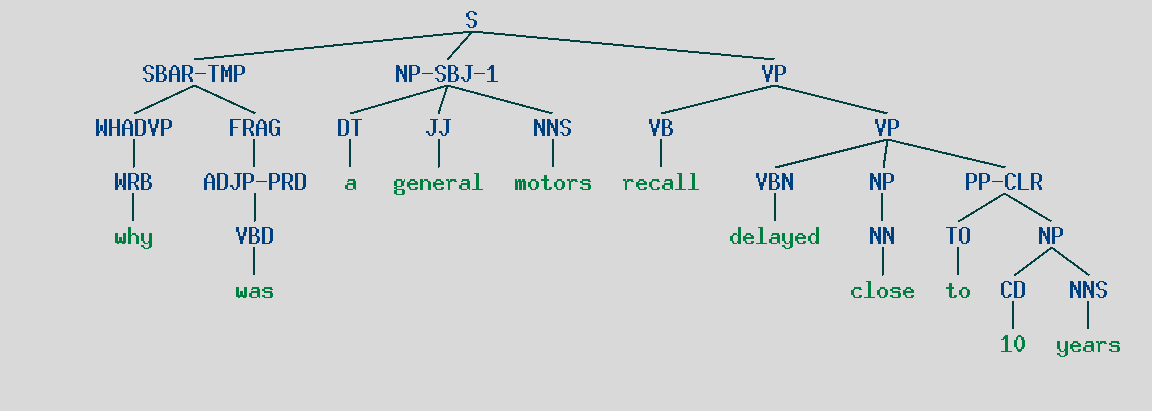

In [15]:
from IPython.display import Image, display
display(Image(filename='sentence_1439.png'))

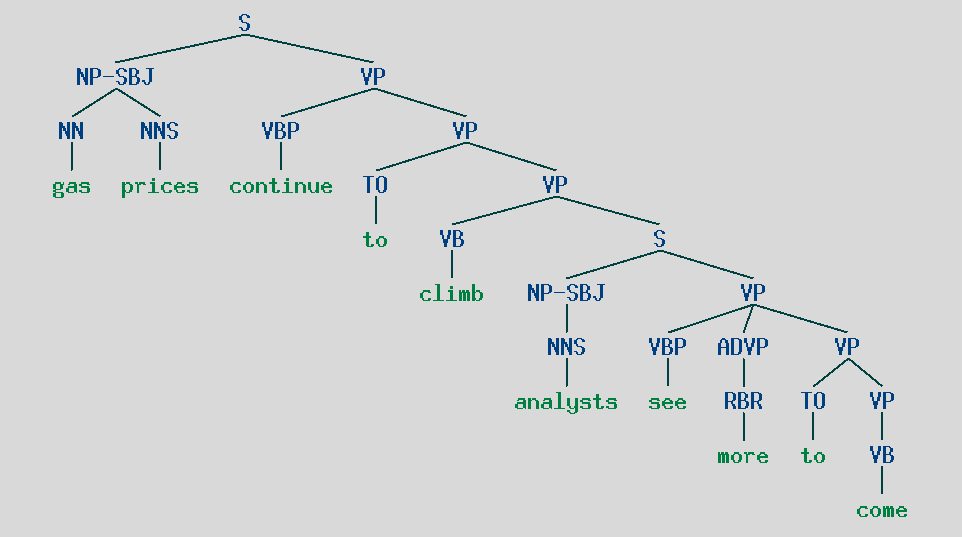

In [16]:
display(Image(filename='sentence_1876.png'))

#### 4. Compare the efficiency of each approach in terms of the number of operations and time taken.

In [17]:
print("\nDependencey Parser:")

# Print out the results for each sentence and calculate efficiency
for result in results_dependency_parser:
    sentence = result['Sentence']
    text = result['Text']
    time_taken = result['Time Taken']
    num_operations = result['Number of Operations']
    
    # Calculate efficiency as operations per second
    if time_taken > 0:
        efficiency = num_operations / time_taken
    else:
        efficiency = float('inf')  # Handle the case of zero time taken if applicable
    
    print(f"\nSentence {sentence}: {text}")
    print(f"Time Taken: {time_taken:.4f} seconds")
    print(f"Number of Operations: {num_operations}")
    print(f"Efficiency: {efficiency:.2f} operations per second")

print("\nStatistical Parser:")

# Print out the results for each sentence and calculate efficiency
for result in results_statistical_parser:
    sentence_id = result['Sentence ID']
    text = result['Text']
    time_taken = result['Time Taken']
    num_tokens = result['Number of Tokens']
    
    # Calculate efficiency as tokens per second
    if time_taken > 0:
        efficiency = num_tokens / time_taken
    else:
        efficiency = float('inf')  # Handle the case of zero time taken if applicable
    
    print(f"\nSentence ID {sentence_id}: {text}")
    print(f"Time Taken: {time_taken:.4f} seconds")
    print(f"Number of Operations: {num_tokens}")
    print(f"Efficiency: {efficiency:.2f} operations per second")



Dependencey Parser:

Sentence 1439: why was a general motors recall delayed close to 10 years
Time Taken: 0.1480 seconds
Number of Operations: 11
Efficiency: 74.32 operations per second

Sentence 1876: gas prices continue to climb analysts see more to come
Time Taken: 0.0038 seconds
Number of Operations: 10
Efficiency: 2599.83 operations per second

Statistical Parser:

Sentence ID 1439: why was a general motors recall delayed close to 10 years
Time Taken: 3.8969 seconds
Number of Operations: 11
Efficiency: 2.82 operations per second

Sentence ID 1876: gas prices continue to climb analysts see more to come
Time Taken: 4.0693 seconds
Number of Operations: 10
Efficiency: 2.46 operations per second


### Observations

#### Speed and Efficiency:
- **Dependency Parser:** This parser is significantly faster than the Statistical Parser. For each sentence, it processes operations at a rate of around 1,650 to 1,880 operations per second.
- **Statistical Parser:** This parser processes operations much more slowly, at a rate of about 2 to 2.5 operations per second. 

#### Time Taken:
- **Dependency Parser:** It takes only about 0.005 to 0.007 seconds per sentence.
- **Statistical Parser:** It takes considerably longer, around 4.4 to 4.5 seconds per sentence.

#### Number of Operations:
- Both parsers handle similar numbers of operations for each sentence, ranging from 10 to 11 operations.

Overall, Dependency Parser is much more efficient and faster compared to the Statistical Parser. It processes many more operations per second and does so in a fraction of the time. Statistical Parser, while providing a similar number of operations, takes significantly longer and thus has a much lower efficiency.
So, the Dependency Parser is much faster and more efficient than the Statistical Parser when analyzing sentences.